# Project: No-show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
> - **`ScheduledDay:`** Tells us on what day the patient set up their appointment.
> - **`Neighborhood:`** Indicates the location of the hospital.
> - **`Scholarship:`**  Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
> - **`No-show:`** Tells us if the patient showed up for the appointment or not.
     - **`Yes:`** means the patient did not show up for the appointment
     - **`No:`** means the patient showed up to the appointment.
> - Plus other columns like **`Gender`** and **`Age`** which is self explanatory
> - Also **`Hipertension`**, **`Diabetes`**, **`Alcoholism`**, **`Handcap`**, and **`SMS_received`** which the responds shows as 0 and 1 (0 means false and 1 means true)
     

### Questions for Analysis

> 1. What is the ratio of male to female that shows up to appointment. 
> 2. How does the following factors improve or affect patient to show up for an appointment
    1. Age
    2. Hipertension
    3. Diabetes
    4. Alcoholism
    5. Handcap
    6. SMS received

### Importing all the packages that will be needed

In [1]:
#import statements for all the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [46]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> Let's access the dataset and do all the neccessary clean up for proper analysis.


### General Properties

> **Load the dataset and view first few rows**

In [2]:
# Load data and print out a few lines.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Let's start with checking the size of the dataset using .shape command**

In [4]:
#checking the shape of the dataframe
df.shape

(110527, 14)

**Let's check for missing values and the datatype of each feature.**

In [5]:
#using info and dtypes to access if there are missing values and the datatypes of each feature.
df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


(None, PatientId                float64
 AppointmentID              int64
 Gender                    object
 ScheduledDay      datetime64[ns]
 AppointmentDay    datetime64[ns]
 Age                        int64
 Neighbourhood             object
 Scholarship                int64
 Hipertension               int64
 Diabetes                   int64
 Alcoholism                 int64
 Handcap                    int64
 SMS_received               int64
 No-show                   object
 dtype: object)


### Data Cleaning

After Accessing the dataset, it looks like we don't have any missing values, let's go ahead and check for duplicates and match variables with datatype.

The next few lines of code will check for duplicates and also looking at the data, `ScheduledDay` and `AppointmentDay` seems to be String, let's convert that to datetime datatype.
Also drop `PatientId`, `AppointmentID` and `Neighbourhood` since we won't be using those.

**Checking for duplicates**

In [7]:
#checking for duplicate
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

**Converting ScheduleDay and AppointmentDay from String to datetime for proper flow of analysis**

In [4]:
#convert ScheduleDay and AppointmentDay from String to datetime
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

**Here I will drop PatientId and AppointmentID to get the dataset trim and eassy to check since I won't be using them**

In [6]:
#Drop PatientId and AppointmentID
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [7]:
#Oops! forgot to add Neighbourhood, let's do that here
df.drop(['Neighbourhood'], axis = 1, inplace = True)

#check for changes using head()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


**Let's rename No-show to No_show. First, so it alligns with sms received, and secondly for ease of use while coding**

In [8]:
#seems we will need to rename 'No-show' to 'No_show'
df.rename(columns = {'No-show':'No_show'}, inplace = True)

In [8]:
#check for changes using head()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


**Now let's investegate the dataset more for any incorrect or odd values**

In [9]:
#let's check more for any incorrect or odd values within the dataset with describe()
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Seems like we have a negetive age in the dataset, let's find them!**

In [13]:
#useing value_counts to check how many rows has negetive age value
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

**Since there is only 1 row with the negetive value, let's just say it was a mistaken input and drop the row.**

In [9]:
#Drop the row with the negetive age
df.drop(df.query("Age == -1").index,inplace=True)

In [11]:
#Let's confirm changes
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the ratio of male to female that shows up to appointment)

*To answer this question, let's first check how many male and female are present in the dataset, also check how many showed up and how many did not show up for appointment*

In [16]:
#check count of male and female
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [17]:
#check count of female/male show and no-show
df.groupby("Gender")["No_show"].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

**A bar chart representing the number of females/males that shows up to appointment and the number of females/males that did not shows up.**

In [23]:
def gender_show():
    """ 
    This is a function that plots the chart for The ratio of male to female that shows up vs no show
    """
    sns.countplot(x = "Gender", hue="No_show", data=df)
    plt.title("The ratio of male to female that shows up vs no show");

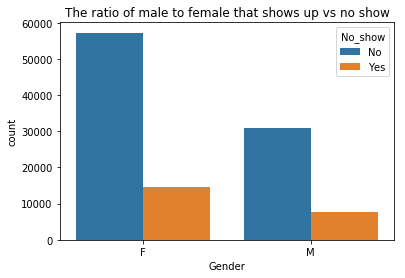

In [24]:
gender_show()

The bar chart above represent the number of females/males that shows up to appointment and the number of females/males that did not shows up.

checking the chart, we can see that more women gets to make it to their appointment than men but if we want to consider the count of male to female earlier checked, and the count of no show and show, we cannot really compare using the graph since the females are more than male with a large figure. 

So looking at the count, we can see that `57245 of female show up to the appointment comparing to the total number of 71839 of female` (difference of 14594 ~~ which is no show). And then `30962 of male show up comparing to the total number of 38687 of male` (difference of 7725 ~~ which is no show)

With this, let's look futher with percentage plot.

In [28]:
#checking for percentage of female/male show and no show values
#female check
no_perF=(57245/71839)*100
yes_perF=(14594/71839)*100

#male check
no_perM=(30962/38687)*100
yes_perM=(7725/38687)*100

**Plot a pie chart representing the percentage ratio of male to female that shows up to appointment vs no show**

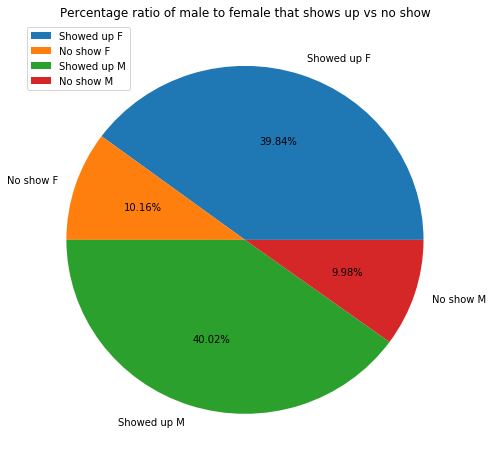

In [33]:
plt.figure(figsize=(8, 8))
plt.pie([no_perF, yes_perF, no_perM, yes_perM],
        labels=["Showed up F", "No show F", "Showed up M", "No show M"],
        autopct='%1.2f%%', startangle=360)
plt.title("Percentage ratio of male to female that shows up vs no show")
plt.legend(loc='upper left');

Yeh! form the pie chart above we can clearly see that more males turn up for their appointment than the females with a slight difference of about .2%.

### Research Question 2  (How does the following factors improve or affect patient to show up for an appointment)
(**`Age` `Hipertension`  `Diabetes`  `Alcoholism`  `Handcap` and `SMS received`**)

To answer this question, let's look at the reletionship between each of the factors and how it affects showing up for an appointment

**But before we start, let's look at how each of the variables are evenly distributed**
> This will help us to know how many patients are true or false in each of variable Alcoholism, Diabetes, Handcap, Hipertension. Also how the age ranges and how many people recieved sms or not.

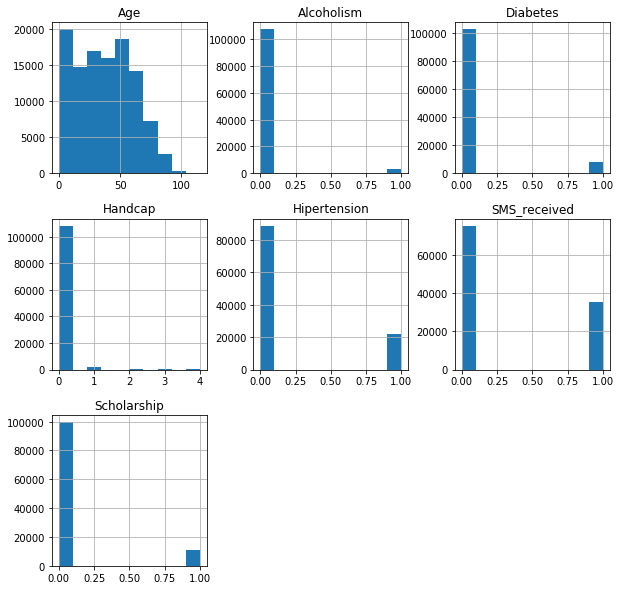

In [48]:
df.hist(figsize=(10,10));

From the histogram above, the Age ranges from 0 to 100 (I take age 0 to be babies under the age of 1, so we are not going to remove them or find mean), lot's of patients are not Alcoholic, Diabetic or Handcap. About 21,000 patients are Hipertensive, also about 35,000 patients receives sms and few patients of about 15,000 has scholarship.

WIth this in mind, let's try to answer the question: How does the factors improve or affect patient to show up for an appointment.
(**`Age` `Hipertension`  `Diabetes`  `Alcoholism`  `Handcap` and `SMS received`**)

First let's look at how the age is distributed using a box plot

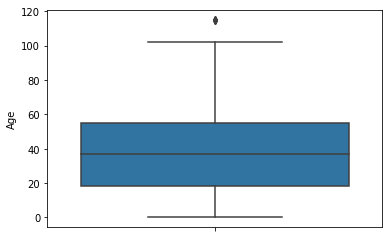

In [34]:
sns.boxplot(y = "Age", data=df);

comparing the box plot and the histogram earlier plotted, the box plot clearly shows that the highest age is above 100, to around 115.

Now let's continue in checking the relationship between Age and no show

**Bar chart representing the relationship between `Age` vs `No_show`**

In [21]:
#finding the relationship b/w Age and No show using groupby() function
df.groupby('No_show').Age.mean()

No_show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

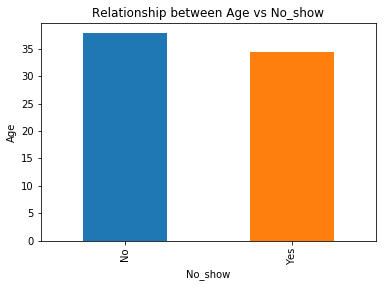

In [30]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').Age.mean().plot(kind= 'bar')
plt.ylabel("Age")
#plt.xlabel("No show")
plt.title("Relationship between Age vs No_show");

**Bar chart representing the relationship between `Hipertension` vs `No_show`**

In [23]:
#finding the reletionship b/w Hipertension and No show using groupby() function
df.groupby('No_show').Hipertension.mean()

No_show
No     0.204394
Yes    0.169004
Name: Hipertension, dtype: float64

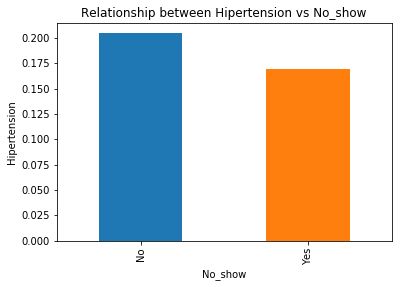

In [53]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').Hipertension.mean().plot(kind= 'bar')
plt.ylabel("Hipertension")
plt.title("Relationship between Hipertension vs No_show");

**Bar chart representing the relationship between `Diabetes` vs `No_show`**

In [25]:
#finding the relationship b/w Diabetes and No show using groupby() function
df.groupby('No_show').Diabetes.mean()

No_show
No     0.073838
Yes    0.064071
Name: Diabetes, dtype: float64

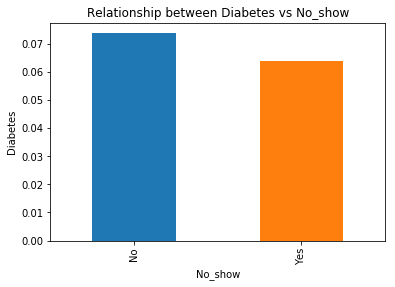

In [54]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').Diabetes.mean().plot(kind= 'bar')
plt.ylabel("Diabetes")
plt.title("Relationship between Diabetes vs No_show");

**Bar chart representing the relationship between `Alcoholism` vs `No_show`**

In [27]:
#finding the relationship b/w Alcoholism and No show using groupby() function
df.groupby('No_show').Alcoholism.mean()

No_show
No     0.030417
Yes    0.030333
Name: Alcoholism, dtype: float64

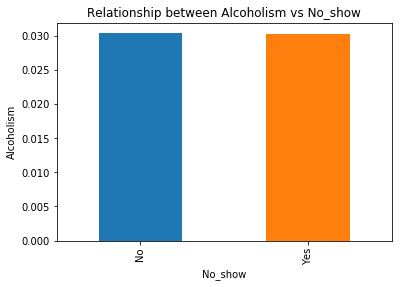

In [55]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').Alcoholism.mean().plot(kind= 'bar')
plt.ylabel("Alcoholism")
plt.title("Relationship between Alcoholism vs No_show");

**Bar chart representing the relationship between `Handcap` vs `No_show`**

In [29]:
#finding the relationship b/w Handcap and No show using groupby() function
df.groupby('No_show').Handcap.mean()

No_show
No     0.022742
Yes    0.020297
Name: Handcap, dtype: float64

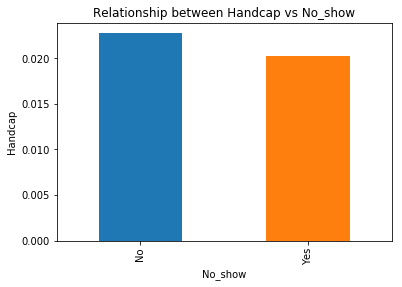

In [56]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').Handcap.mean().plot(kind= 'bar')
plt.ylabel("Handcap")
plt.title("Relationship between Handcap vs No_show");

**Bar chart representing the relationship between `SMS received` vs `No_show`**

In [31]:
#finding the relationship b/w SMS received and No show using groupby() function
df.groupby('No_show').SMS_received.mean()

No_show
No     0.291337
Yes    0.438371
Name: SMS_received, dtype: float64

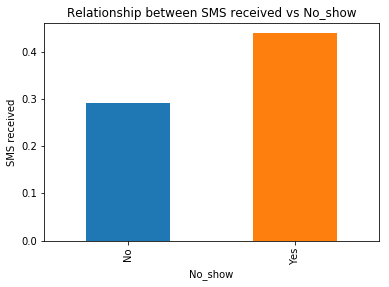

In [57]:
#plotting the chart
#Remember that 'No' means they showed up and 'Yes' means they did not show up
df.groupby('No_show').SMS_received.mean().plot(kind= 'bar')
plt.ylabel("SMS received")
plt.title("Relationship between SMS received vs No_show");

<a id='conclusions'></a>
## Conclusions

>Reflecting back at the questions we were looking at with this dataset:
> 1. What is the ratio of male to female that shows up to appointment. 
> 2. How does the following factors improve or affect patient to show up for an appointment
    1. Age
    2. Hipertension
    3. Diabetes
    4. Alcoholism
    5. Handcap
    6. SMS received

> for question 1. What is the ratio of male to female that shows up to appointment.

> First plotted a bar chart representing the number of females/males that shows up to appointment and the number of females/males that did not show up.
> Checking the chart, it shows that more women gets to make it to their appointment than men but taking into consideration the count of male (38687) to female (71839), we cannot really compare using the graph since the females are more than male with a difference of 33152 almost the same quantity as the total number of male.

> Also looking at the count of no show and show, we can see that 57245 of female showed up to the appointment comparing to the total number of 71839 of female (difference of 14594 ~~ which is no show). And then 30962 of male showed up comparing to the total number of 38687 of male (difference of 7725 ~~ which is no show)

> With this, I decided to investigate more using percentage plot and Yeh! form the pie chart plotted above it is clearly seen that more males turn up for their appointment than the females with a slight difference of about .2%.

> The additional research that can be done with this question is to compare with other factors why the females are missing their appointment.

> 2. How does the following factors improve or affect patient to show up for an appointment
    1. Age
    2. Hipertension
    3. Diabetes
    4. Alcoholism
    5. Handcap
    6. SMS received
 
> From the findings, looking at the mean differences of patient showing up and not showing up to an appointment with the listed factors above, the differencies are quite slim, let's explore each of them:
    
>    1. **Age** - has a mean value of `37.8` for patients that showed up and `34.3` for patients that did not show up difference of `3.5`

>    2. **Hipertension** - has a mean value of `0.2` for patients that showed up and `0.2` for patients that did not show up no difference 

>    3. **Diabetes** - has a mean value of `0.1` for patients that showed up and `0.1` for patients that did not show up no difference 

>    4. **Alcoholism** - has a mean value of `0.03` for patients that showed up and `0.03` for patients that did not show up no difference  

>    5. **Handcap** - has a mean value of `0.02` for patients that showed up and `0.02` for patients that did not show up no difference    

>    6. **SMS received** - has a mean value of `0.3` for patients that showed up and `0.4` for patients that did not show up difference of `0.1`

> So in conclusion for question 2, we can say that Age has a big effect on wheather the patient will show up or not followed by SMS received compared to other factors.

> The additional research that can be done with this question is to futher investigate the 2 factors that influenced the appointment show up, starting with age, we can categorise age by groups and check which age range/group shows up and which group shows less.

> My limitation regarding this exploration is time constraint with respect to the overall timing of the program, also I'm still in the learning process and getting familier with every aspect. There are alot to explore with the dataset which I cannot go into right now.

>Limitation about the dataset is data for the type of treatment the patient booked for and the prices, also data for the income level of patients in ranges to check if financial constraint is the chanllenge of not making to appointments as it is not all the patients that has scholarship.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0